# Named Entity Recognition using Spacy and NLTK
## Name: Srinitish Srinivasan
## Reg.No: 21BAI1394 

In [1]:
import pandas as pd 
import numpy as np 
import nltk 
from nltk.tokenize import word_tokenize
from nltk import pos_tag

from nltk.corpus import stopwords,wordnet
from nltk.stem import SnowballStemmer,WordNetLemmatizer

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("words")
nltk.download("stopwords")
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /Users/smudge/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/smudge/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/smudge/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/smudge/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/smudge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/smudge/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

## Load Dataset

In [2]:
import os 
from dotenv import load_dotenv

load_dotenv('.env')
path=os.getenv("spam_classification")

dataset=pd.read_csv(path,encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sample=dataset.loc[20]['v2']
sent=pos_tag(word_tokenize(sample))
sent

[('Is', 'VBZ'),
 ('that', 'DT'),
 ('seriously', 'RB'),
 ('how', 'WRB'),
 ('you', 'PRP'),
 ('spell', 'VBP'),
 ('his', 'PRP$'),
 ('name', 'NN'),
 ('?', '.')]

After Chunking (S
  Is/VBZ
  that/DT
  seriously/RB
  how/WRB
  you/PRP
  spell/VBP
  his/PRP$
  (mychunk name/NN)
  ?/.)


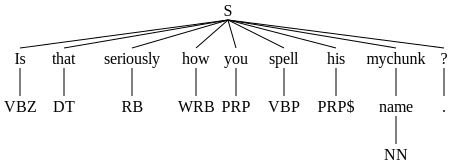

In [4]:
from nltk import RegexpParser
from nltk.draw.tree import TreeView
from IPython.display import Image
import svgling

# chunk all adjacence nouns
patterns= """mychunk:{<NN.*>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sent)
print("After Chunking",output)
svgling.draw_tree(output)

In [5]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(output)
iob_tagged

[('Is', 'VBZ', 'O'),
 ('that', 'DT', 'O'),
 ('seriously', 'RB', 'O'),
 ('how', 'WRB', 'O'),
 ('you', 'PRP', 'O'),
 ('spell', 'VBP', 'O'),
 ('his', 'PRP$', 'O'),
 ('name', 'NN', 'B-mychunk'),
 ('?', '.', 'O')]

## Named Entity Recognition using NLTK

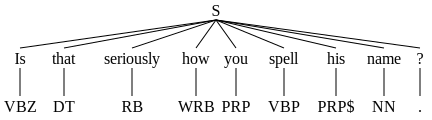

In [6]:
from nltk.chunk import ne_chunk

ne_res = ne_chunk(pos_tag(word_tokenize(sample)))

ne_res

## Named Entity Recognition using Spacy

In [7]:
import sqlite3

p=os.getenv("wikibooks")
cnx=sqlite3.connect(p)

In [8]:
df_wikibooks = pd.read_sql_query("SELECT * FROM en", cnx)
df_wikibooks.head()

,title,url,abstract,body_text,body_html
0,Wikibooks: Radiation Oncology/NHL/CLL-SLL,https://en.wikibooks.org/wiki/Radiation_Oncolo...,Chronic Lymphocytic Leukemia and Small Lymphoc...,Front Page: Radiation Oncology | RTOG Trials |...,"<div class=""mw-parser-output""><table width=""10..."
1,Wikibooks: Romanian/Lesson 9,https://en.wikibooks.org/wiki/Romanian/Lesson_9,==Băuturi/Beverages==,Băuturi/Beverages[edit | edit source]\nTea : C...,"<div class=""mw-parser-output""><h2><span id=""B...."
2,Wikibooks: Karrigell,https://en.wikibooks.org/wiki/Karrigell,Karrigell is an open Source Python web framewo...,Karrigell is an open Source Python web framewo...,"<div class=""mw-parser-output""><p>Karrigell is ..."
3,Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...,https://en.wikibooks.org/wiki/The_Pyrogenesis_...,====setupUnitPanel====,setupUnitPanel[edit | edit source]\nHelper fun...,"<div class=""mw-parser-output""><h4><span class=..."
4,Wikibooks: LMIs in Control/pages/Exterior Coni...,https://en.wikibooks.org/wiki/LMIs_in_Control/...,== The Concept ==,Contents\n\n1 The Concept\n2 The System\n3 The...,"<div class=""mw-parser-output""><div id=""toc"" cl..."


In [10]:
import spacy

nlp = spacy.load("en_core_web_sm")
wiki_ex = df_wikibooks.iloc[11]['body_text']
doc = nlp(wiki_ex)
doc

This Wikibooks page is a fact sheet and analysis on the article "Habitual physical activity in children and adolescents with cystic fibrosis" about how exercise is related to the disease Cystic Fibrosis.

Contents

1 Background of this research
2 Where is the research from ?
3 What kind of research was this?
4 What did the research involve?

4.1 Pulmonary Function testing
4.2 Pros / Cons of this test


5 What were the basic results?
6 What conclusion can we take from this research ?
7 Practical Advice
8 Further information/ Resources

8.1 Cystic Fibrosis Australia
8.2 Cystic Fibrosis's National Ambassador Nathan Charles


9 References



Background of this research[edit | edit source]
The research was about the effects of taking part in exercise constantly or making it a habit in the population of children and teens that are severing from the genetic condition cystic Fibrosis.
What is  Cystic Fibrosis
It is a genetic condition, affecting lungs and digestion. Unfortunately, there is no 

In [11]:
print('Persons from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'PERSON']))
print('Organizations from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'ORG']))

Persons from the document above
{Faber J, Nathan Charles, Kelsey S, pulmonary lung, F. Kelsey S. Measuring Physical Activity, Pulmonary Function, Godfrey, ↑ M. Orenstein, Berger R, ↑ Gulmans V, Nathan Charles, Pulmonary Function, Doershuk C., Nathan Charles, David Michael Orenstein, ↑ Charles N. NATIONAL, cycle ergometer, David Michael, Nathan Charles, Pulmonary, Patricia, Questionnaire}
Organizations from the document above
{Helders P. Outpatient, Pros / Cons, 7 Practical Advice, CF, CF., CF, Playing Elite Rugby, the Journal of Paediatric Pulmonology, CYSTIC FIBROSIS AUSTRALIA, Cystic Fibrosis, Saskatoon Public Library, the Australian Cystic Fibrosis Council, Cystic Fibrosis's, the American Children’s, the CF community.[3] Two, Cystic Fibrosis, NIXON P, Pros / Cons, Cystic Fibrosis, CF, Cystic Fibrosis, Cystic Fibrosis's, Cystic Fibrosis, CF, Cystic Fibrosis's, CF, CF, Brackel H}


In [12]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)